Nathan Deinlein <br>
Ryan Kinney <br>
Chris Roche <br>
Cameron Stewart <br>

# Machine Learning 1 - Project 1

## Section 1: Business Understanding 

For our lab report, our team decided to select a horse racing dataset where racing data was collected between 1997 and 2005 on Hong Kong’s two racetracks. This data was collected and posted on Kaggle (https://www.kaggle.com/gdaley/hkracing?select=runs.csv) with the goal of searching for information that can be used to generate profit when bets are placed on the horses competing. Included in this dataset are two csv files called “races” and “runs”. With a thorough analysis, a data scientist can gain an advantage over other horse betters.

Within the dataset called “runs”, there is a response variable labeled “won”. This is a binary feature which shows whether each unique horse in a race won or did not win. Using a logistic regression model with our response being the “won” feature is a good way to be able to predict the outcomes of future horse races. This is especially useful when it comes to horse betting or gambling in general due to the fact that the odds of winning is a common metric used in the gambling industry. After using a 10-fold cross validation, we can evaluate our logistic regression model with an accuracy score, sensitivity score, specificity score, or using AIC to compare competing models.

However, in horse betting, betters have the option to place three kinds of bets. This includes betting on who will win (a win bet), betting on who will place first or second (a place bet), or betting on who will place first, second, or third (a show bet) (https://www.rgj.com/story/sports/2014/05/16/just-horse-betting-work/2212724/). Deciding on the type of bet is dependent on how much risk the better is willing to take. Betting on a win bet will pay out better than betting on a show bet because the horse you are betting on has to place first. 

Luckily, this dataset includes another feature labeled “results” where the individual place of each unique horse in a race is recorded. With this feature, we can use an MLR model to predict the place of a horse and calculate metrics such as RMSE and ASE to evaluate our predictions. Another option that could be useful for show betters is to transform the results feature into a binary feature where we count places first, second, and third as a win, and all other places as not a win. From there we can model using logistic regression using the same metrics as our first logistic regression model which uses the “won” feature as our response.

## Section 2: Data Meaning Type 

The Horse Racing From Hong Kock dataset provided by Kaggle contains two datasets. The first is the “runs” dataset which contains 79,447 observations and 37 features. These features describe various aspects of a horse and its performance in a given race. Each observation in the runs dataset includes a race_id. Kaggle provides a second “races” dataset which race_id corresponds to. This provides information on the specific track and race such as surface condition, length, and prize. For this stage in our Exploratory Data Analysis, we focused on the “runs” dataset and did not pull in the “races” data. Potential uses for the “races” dataset as well as other possible data will be discussed in Section 8: New Features.

There are several key continuous features contained in the runs data set:
- Result: the position the horse finished in. Integer values ranging from 1 - 14
- Lengths_beyond: a floating point value indicating how far the horse completed behind the leader. The winning horse will have a lengths_behind of zero.
- Declared_weight: floating point value for the weight of the horse, the jockey, and the equipment in pounds.
- Actual_weight: floating point value for the weight the horse carried; i.e. the weight of the Jockey and equipment
- Win_odds: floating point value for the odds of the horse to win the race
- Place_odds: floating point value for the odds of the horse to place in 1st, 2nd, or 3rd

Several key categorical features contained in the data set:
- Won: a boolean value where 1 indicates the horse won the race and 0 indicates the horse did not. A horse with a Result of 1 will have a Won of 1. All others will have a Won of zero.
- Horse_country: a country code for the country of origin for the horse. Examples are NZ, AUS, USA
- Horse_type: examples are gelding, mare, rig
- Horse_age: all horses in the data set are 2, 3, 4, 5, 6, 7, 8, 9, or 10 years old at the time of race. The average age of horses in the dataset is 3.3 years

Each observation contains 18 features related to the horse's performance at a given section of the race. These can be broadly categorised into three types:
- Time: the time in seconds for the horse to pass through a given section of the race
- Behind_sec: the number of lengths behind the leader for a given section of the race
- Position_sec: the horse's position for a given section of the race

The dataset contains features for six sections. Not all race tracks are the same size, therefore not all observations have entries for all six sections. However, all observations have data for at least three sections. More detail on missing track section data is discussed in Section 3: Data Quality.

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import warnings
warnings.simplefilter('ignore', DeprecationWarning)

# read in the data
url = "https://raw.githubusercontent.com/nedeinlein/Machine_Learning_I/main/runs.csv"
runs_df = pd.read_csv(url, index_col=0)

In [2]:
# Summary statistics of each feature
runs_df.info()
runs_df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79447 entries, 0 to 6348
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   horse_no         79447 non-null  int64  
 1   horse_id         79447 non-null  int64  
 2   result           79447 non-null  int64  
 3   won              79447 non-null  float64
 4   lengths_behind   79447 non-null  float64
 5   horse_age        79447 non-null  int64  
 6   horse_country    79445 non-null  object 
 7   horse_type       79445 non-null  object 
 8   horse_rating     79447 non-null  int64  
 9   horse_gear       79447 non-null  object 
 10  declared_weight  79447 non-null  float64
 11  actual_weight    79447 non-null  int64  
 12  draw             79447 non-null  int64  
 13  position_sec1    79447 non-null  int64  
 14  position_sec2    79447 non-null  int64  
 15  position_sec3    79447 non-null  int64  
 16  position_sec4    46226 non-null  float64
 17  position_sec5

,horse_no,horse_id,result,won,lengths_behind,horse_age,horse_rating,declared_weight,actual_weight,draw,...,time2,time3,time4,time5,time6,finish_time,win_odds,place_odds,trainer_id,jockey_id
count,79447.000000,79447.000000,79447.000000,79447.000000,79447.000000,79447.000000,79447.000000,79447.000000,79447.000000,79447.000000,...,79447.000000,79447.000000,46226.000000,10079.000000,1296.000000,79447.000000,79447.000000,75712.000000,79447.000000,79447.000000
mean,6.905623,2204.410525,6.838597,0.080053,6.108901,3.339346,61.034904,1104.953568,122.729656,6.876005,...,22.928985,23.864054,24.039662,24.105221,24.350216,85.322914,28.812977,7.423177,79.793007,85.832341
std,3.760711,1275.049375,3.730498,0.271378,33.636209,0.876763,11.748788,62.347597,6.305496,3.747589,...,3.599727,3.571163,4.663367,1.127963,1.314755,18.512883,30.097375,8.823430,45.118874,54.338105
min,1.000000,0.000000,1.000000,0.000000,-0.500000,2.000000,10.000000,693.000000,103.000000,1.000000,...,19.990000,21.000000,21.200000,21.420000,21.500000,55.160000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,1085.000000,4.000000,0.000000,1.750000,3.000000,60.000000,1062.000000,118.000000,4.000000,...,22.290000,23.230000,23.320000,23.410000,23.570000,70.590000,7.700000,2.400000,47.000000,39.000000
50%,7.000000,2209.000000,7.000000,0.000000,4.000000,3.000000,60.000000,1102.000000,123.000000,7.000000,...,22.870000,23.760000,23.890000,23.960000,24.120000,83.350000,15.000000,4.100000,75.000000,76.000000
75%,10.000000,3308.000000,10.000000,0.000000,6.750000,3.000000,60.000000,1146.000000,128.000000,10.000000,...,23.520000,24.410000,24.560000,24.630000,24.820000,100.780000,38.000000,8.600000,118.000000,138.000000
max,14.000000,4404.000000,14.000000,1.000000,999.000000,10.000000,138.000000,1369.000000,133.000000,15.000000,...,999.000000,999.000000,999.000000,49.570000,34.150000,163.580000,99.000000,101.000000,175.000000,185.000000


## Section 3: Data Quality

Before cleaning, the races dataset contains 545,959 missing values. These are contained within 12 out of 37 columns.

The table below shows the percent missing values by feature:

In [3]:
# List percent of null entries per feature
runs_df.isna().sum() # missing values by column
runs_df.isna().sum().sum() # total missing values
runs_df.isna().sum() * 100 / len(runs_df) # percent missing values by column

horse_no            0.000000
horse_id            0.000000
result              0.000000
won                 0.000000
lengths_behind      0.000000
horse_age           0.000000
horse_country       0.002517
horse_type          0.002517
horse_rating        0.000000
horse_gear          0.000000
declared_weight     0.000000
actual_weight       0.000000
draw                0.000000
position_sec1       0.000000
position_sec2       0.000000
position_sec3       0.000000
position_sec4      41.815298
position_sec5      87.313555
position_sec6      98.368724
behind_sec1         0.000000
behind_sec2         0.000000
behind_sec3         0.000000
behind_sec4        41.815298
behind_sec5        87.313555
behind_sec6        98.368724
time1               0.000000
time2               0.000000
time3               0.000000
time4              41.815298
time5              87.313555
time6              98.368724
finish_time         0.000000
win_odds            0.000000
place_odds          4.701247
trainer_id    

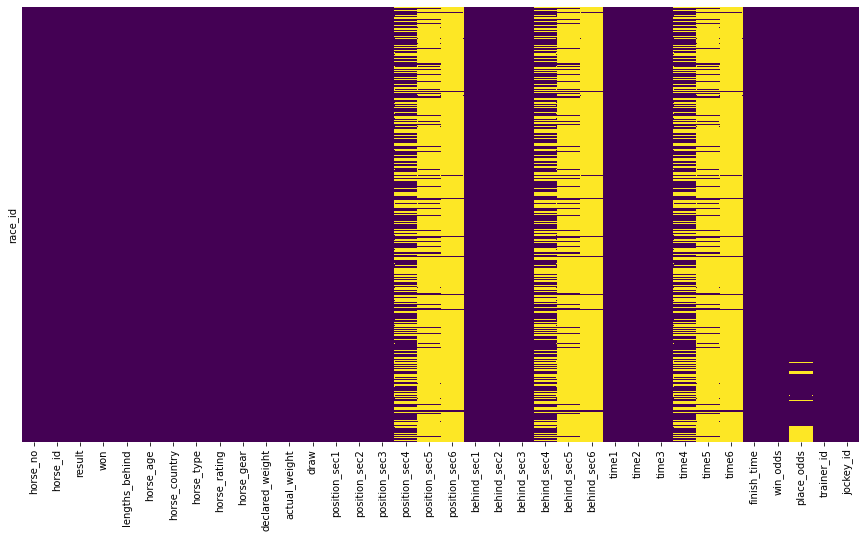

In [4]:
matplotlib.rcParams['figure.figsize'] = [15, 8]
sns.heatmap(runs_df.isnull(), yticklabels=False,cbar=False, cmap='viridis')

The missing values fall into three types:
- In race performance: sections 1 - 6 as discussed in Section 2
- Horse data: country, type
- Pre-race odds

The majority of missing data is for race sections 4 - 6. This is because not all tracks are the same size. For the purposes of this EDA, we eliminated the features for track sections 4, 5, and 6. This has the result of effectively trimming our dataset to tracks of the same size (i.e. 3 sections). In the future, instead of simply eliminating the features we could split the data set into multiple and create separate models for tracks that have 3, 4, 5, or 6 sections.

There were only two observations missing horse country and type so those observations were removed from the dataset. This brought total observations to 79,445.

Place_odds was missing 4.7% of observations. For this initial EDA, we imputed the missing place_odds values by using the mean place_odds for the non-missing values. Upon closer inspection of the correlation of features within the data we found a strong correlation between win_odds and place_odds which intuitively makes sense. A better approach to imputing the missing place_odds would likely be to use a regression model to predict the missing place_odds using the win_odds from those observations.


In [5]:
# Drop features with > 40% null, they're not very useful
runs_df = runs_df.drop(['position_sec4', 'position_sec5', 'position_sec6','behind_sec4', 'behind_sec5', 'behind_sec6','time4', 'time5', 'time6'], axis = 1)

# Drop the two entries with null in horse_country
runs_df = runs_df[runs_df['horse_country'].notna()]

# Impute the place_odds with the mean value
## Explore a regression model with win_odds as explanatory variable
runs_df['place_odds'].fillna(value=(runs_df['place_odds'].mean()), inplace=True)

# Recheck missing values
## Non-Null is now 79445 for all features
runs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79445 entries, 0 to 6348
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   horse_no         79445 non-null  int64  
 1   horse_id         79445 non-null  int64  
 2   result           79445 non-null  int64  
 3   won              79445 non-null  float64
 4   lengths_behind   79445 non-null  float64
 5   horse_age        79445 non-null  int64  
 6   horse_country    79445 non-null  object 
 7   horse_type       79445 non-null  object 
 8   horse_rating     79445 non-null  int64  
 9   horse_gear       79445 non-null  object 
 10  declared_weight  79445 non-null  float64
 11  actual_weight    79445 non-null  int64  
 12  draw             79445 non-null  int64  
 13  position_sec1    79445 non-null  int64  
 14  position_sec2    79445 non-null  int64  
 15  position_sec3    79445 non-null  int64  
 16  behind_sec1      79445 non-null  float64
 17  behind_sec2  

Boxplots were used to evaluate outliers and mistakes. In general, there were very few, with a noted exception: for a few features - specifically those dealing with time - it appears a default value of “999” was used when data was missing, such as a horse not finishing the race.

Boxplot for feature “time1” provided for example:

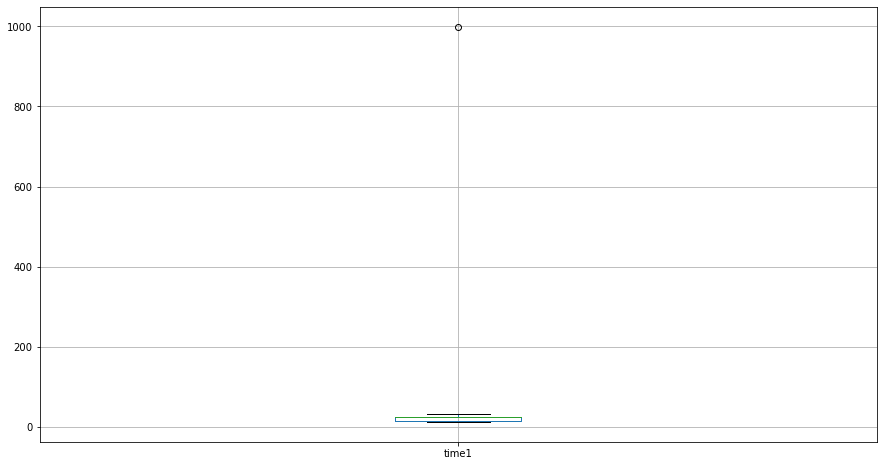

In [6]:
# Use boxplots to quickly looks for outliers
## Below all have what looks like placeholder 999 values that need to be filtered out
## behind_sec1, behind_sec3, time1, time2, time3
boxplot = runs_df.boxplot(column=['time1'])

This was confirmed with the pandas describe function. See the max values below:

In [7]:
# Look closer at outliers
runs_df[['time1','time2','time3','behind_sec1','behind_sec3']].describe()

,time1,time2,time3,behind_sec1,behind_sec3
count,79445.000000,79445.000000,79445.000000,79445.000000,79445.000000
mean,21.135480,22.929003,23.864065,3.378708,4.509426
std,6.930537,3.599769,3.571206,4.282564,16.541736
min,12.390000,19.990000,21.000000,0.150000,0.000000
25%,14.120000,22.290000,23.230000,1.500000,1.750000
50%,24.180000,22.870000,23.760000,3.000000,3.750000
75%,25.360000,23.520000,24.410000,5.000000,5.750000
max,999.000000,999.000000,999.000000,999.000000,999.000000


For this data analysis, all observations with a time value of 999 for the features contained in the table of above were removed. This reduced the number of observations from 79,445 to 79,423.

In [8]:
# Remove rows where a time value is equal to 999
runs_df = runs_df[runs_df.time1 != 999]
runs_df = runs_df[runs_df.time2 != 999]
runs_df = runs_df[runs_df.time3 != 999]
runs_df = runs_df[runs_df.behind_sec1 != 999]
runs_df = runs_df[runs_df.behind_sec3 != 999]
# source: https://stackoverflow.com/questions/18172851/deleting-dataframe-row-in-pandas-based-on-column-value

The boxplot for “time1” once the observations with “999” placeholders were removed:

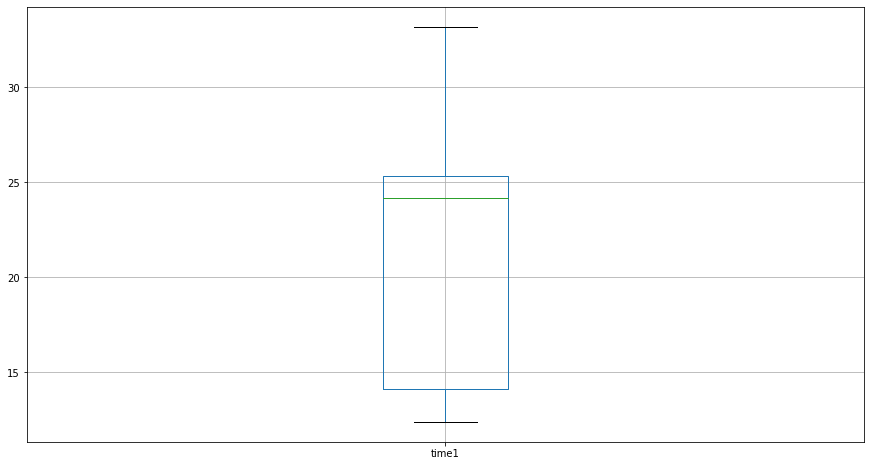

In [9]:
boxplot = runs_df.boxplot(column=['time1'])

There were no duplicates observed in the dataset.

In [10]:
# Check for duplicates
runs_df.duplicated()

race_id
0       False
0       False
0       False
0       False
0       False
        ...  
6348    False
6348    False
6348    False
6348    False
6348    False
Length: 79423, dtype: bool

## Section 4: Simple Statistics

Building out this section was important for looking at the range of values that we are dealing with. Understanding the scale of each attribute allows us to build a more accurate model by keeping any one factor for skewing models based on Euclidian distance. To run this really quickly we used ".describe" to get statistics for all of our continuous variables. This data is below.

In [11]:
pd.set_option('display.max_columns',None)
runs_df.describe()

,horse_no,horse_id,result,won,lengths_behind,horse_age,horse_rating,declared_weight,actual_weight,draw,position_sec1,position_sec2,position_sec3,behind_sec1,behind_sec2,behind_sec3,time1,time2,time3,finish_time,win_odds,place_odds,trainer_id,jockey_id
count,79423.000000,79423.000000,79423.000000,79423.000000,79423.000000,79423.000000,79423.000000,79423.000000,79423.000000,79423.000000,79423.000000,79423.000000,79423.000000,79423.000000,79423.000000,79423.000000,79423.00000,79423.000000,79423.000000,79423.000000,79423.000000,79423.000000,79423.000000,79423.000000
mean,6.905644,2204.346159,6.837050,0.080078,5.858119,3.339461,61.035103,1104.952609,122.730091,6.875729,6.849477,6.845851,6.841897,3.365743,4.081989,4.246243,21.12304,22.916673,23.850489,85.325614,28.806138,7.421841,79.794379,85.832983
std,3.760600,1275.090631,3.729836,0.271415,29.721938,0.876864,11.750531,62.350596,6.305551,3.747588,3.733990,3.732692,3.731396,2.419858,2.685298,3.482293,5.99998,0.982845,0.877137,18.511937,30.093854,8.613459,45.118550,54.338459
min,1.000000,0.000000,1.000000,0.000000,-0.500000,2.000000,10.000000,693.000000,103.000000,1.000000,1.000000,1.000000,1.000000,0.150000,0.150000,0.000000,12.39000,19.990000,21.000000,55.160000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,1085.000000,4.000000,0.000000,1.750000,3.000000,60.000000,1062.000000,118.000000,4.000000,4.000000,4.000000,4.000000,1.500000,1.750000,1.750000,14.12000,22.290000,23.230000,70.590000,7.700000,2.400000,47.000000,39.000000
50%,7.000000,2209.000000,7.000000,0.000000,4.000000,3.000000,60.000000,1102.000000,123.000000,7.000000,7.000000,7.000000,7.000000,3.000000,3.750000,3.750000,24.18000,22.870000,23.760000,83.350000,15.000000,4.400000,75.000000,76.000000
75%,10.000000,3308.000000,10.000000,0.000000,6.750000,3.000000,60.000000,1146.000000,128.000000,10.000000,10.000000,10.000000,10.000000,5.000000,5.750000,5.750000,25.36000,23.520000,24.410000,100.780000,38.000000,8.200000,118.000000,138.000000
max,14.000000,4404.000000,14.000000,1.000000,999.000000,10.000000,138.000000,1369.000000,133.000000,15.000000,14.000000,14.000000,14.000000,47.250000,60.250000,206.750000,33.20000,27.410000,54.950000,163.580000,99.000000,101.000000,175.000000,185.000000


Looking at these numbers, things like horse_no, trainer_id, jockey_id, and horse_id can be ignored as they are simply identifiers. Won is one of the things we are looking to predict. As such it too can be ignored. Result shows us that we are dealing with horses competing for positions 1-14, so no race will ever have more than 14 horses in it. In looking at lengths_behind, 999 did not make sense as a number until we looked at the forum for this data. This number indicates that a horse did not finish the race. For horse age, it looks like the vast majority are around 2-4 years of age when they took part in the race. Declared_weight and actual_weight look extremely different. In looking at the explanation of the data types this is due to the declare_weight being made up of the horse and jockey, whereas actual weight is just the weight of the jockey. Draw is the starting gate location assigned by random to each horse at the beginning of the race. It is interesting to note that for some reason this goes to 15 even though there is no result higher than 14 in the data, so this might be a mistake. Noting the 3 time metrics it is interesting to note these are times taken at 3 various spots on the track. They seem to be all over the spectrum, with times 2 and 3 being more consistent in their deviations than time1. This could be due to a large number of horses dropping out at the beginning of races or inconsistencies in measuring. Finally, the last categories are both odds. These odds are given by the track given their view of the probability a horse will win or place in the top 3. While useful they are not based on statistics from the race and thus are less helpful in being able to predict a win that would do better than the house. Using this information, I paired down the information to a subset that someone at the races would have on hand, and visualized below.

#### Data slice with visualization

C:\Users\nedei\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\nedei\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


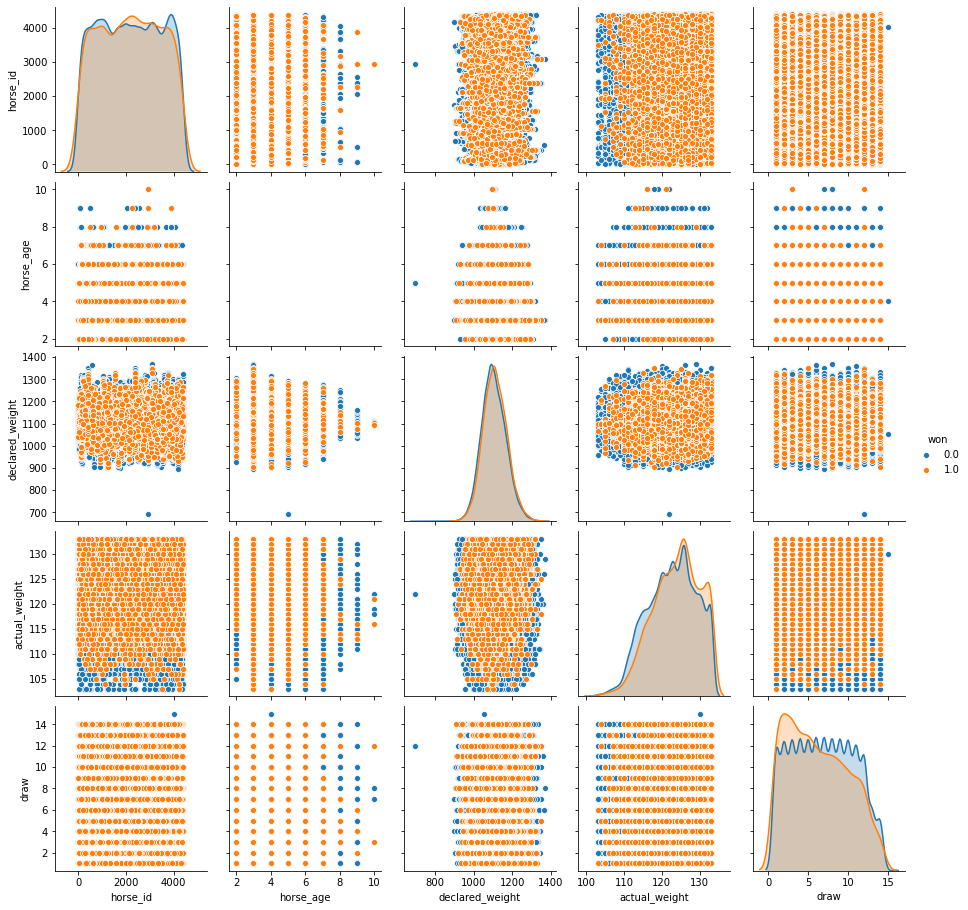

In [12]:
ssvis = runs_df[['won','horse_id','horse_age','declared_weight','actual_weight','draw']]
sns.pairplot(ssvis, hue="won")

The above pairplot shows a breakdown of the subset based on whether the horse and rider combination won or not. A couple of things here are of significant note, very few horses over the age of 8 won a race, and most winners tended to skew to the younger side. Declared_weight follows a steep but mostly normal curve that has winners and losers overlapping nearly perfectly. This means we are unlikely to get a significant indication from this feature whether a horse will win. This is in stark contrast to the draw category, with losers being evenly distributed but winners being heavily skewed towards the 1, 2, and 3 stalls then tapering off dramatically. We would indicate both age and draw to be good possible indicator factors.

## Section 5: Visualize Attributes

For this section, we wanted to examine some of the categorical factors not shown in our previous pair plots. These were horse_country (country of origin for the horse), horse_gear(what type of gear was the horse wearing), horse_type,jockey_id (unique identifier for the jockey riding the horse), and trainer_id (unique identifier for the person who trained the horse). The goal of these plots were to determine whether data in these categories was normally distributed, skewed, bimodal, or had multiple modes.

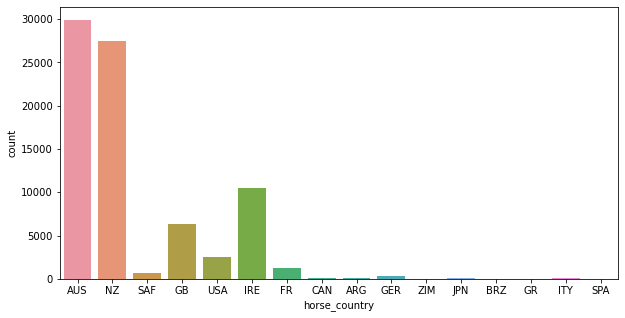

In [13]:
matplotlib.rcParams['figure.figsize'] = [10, 5]
sns.countplot(x = 'horse_country', data = runs_df)

As you can see from this data there are a large number of horses supplied to these Hong Kong race tracks by Australia and New Zealand. Other large centers of where horses were imported from seem to be the British Isles. This data makes sense as Hong Kong was once a British colony, and they still share a number of trade relations with Commonwealth territories. Based on numbers alone we can assume most winners would come from Australia or New Zealand, but it bears futher investigation into win rates if any nation has a disproportionate win rate based on the volume of horses imported.

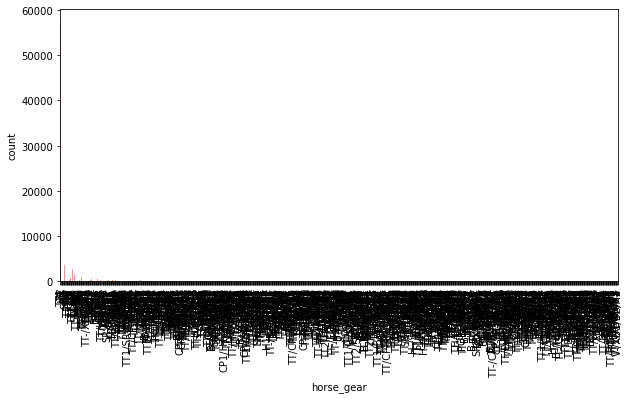

In [14]:
matplotlib.rcParams['figure.figsize'] = [10, 5]
runs_df['horse_gear'].astype("category")
chart = sns.countplot(x = 'horse_gear', data = runs_df)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
None

This graphic was a mess to say the least. There were so many different equipment types listed in here, none of which came anywhere close to posing a substantial percentage of the number of horses. Because there were no groups large enough to get a good prior amount, we can reasonably right off this factor as a confounding variable at best and noise at worst. This is because any group that has won a substantial amount of races based on the equipment is more likely to be a result of other factors making this one most likely statistically insignificant. 

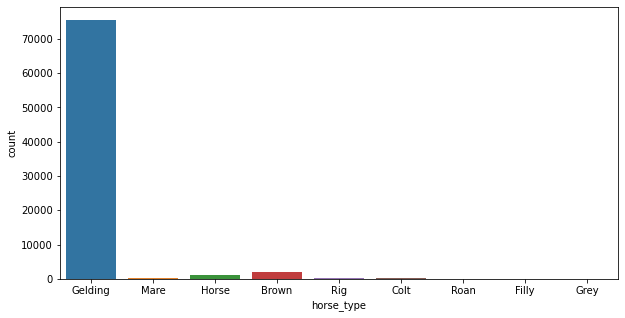

In [15]:
matplotlib.rcParams['figure.figsize'] = [10, 5]
sns.countplot(x = 'horse_type', data = runs_df)

When looking at horse_type nearly the entire population were gelding.  This column was supposed to be reserved for horse sex type. However, there are nonsense data groups in here. So, we will quickly break down the groups that should matter. A gelding is male horse that is castrated. A rig looks like a gelding but still has at least one testicle producing testosterone. A colt is a male horse age two to four that has not been castrated. A mare is a female horse over the age of three. A filly is a female horse under the age of three. All other groups are non-sense. Since the vast majority of the horses are geldings, this makes the data extremely skewed toward gelding attributes. Thus, we should not be using this as a factor in prediction experiments.

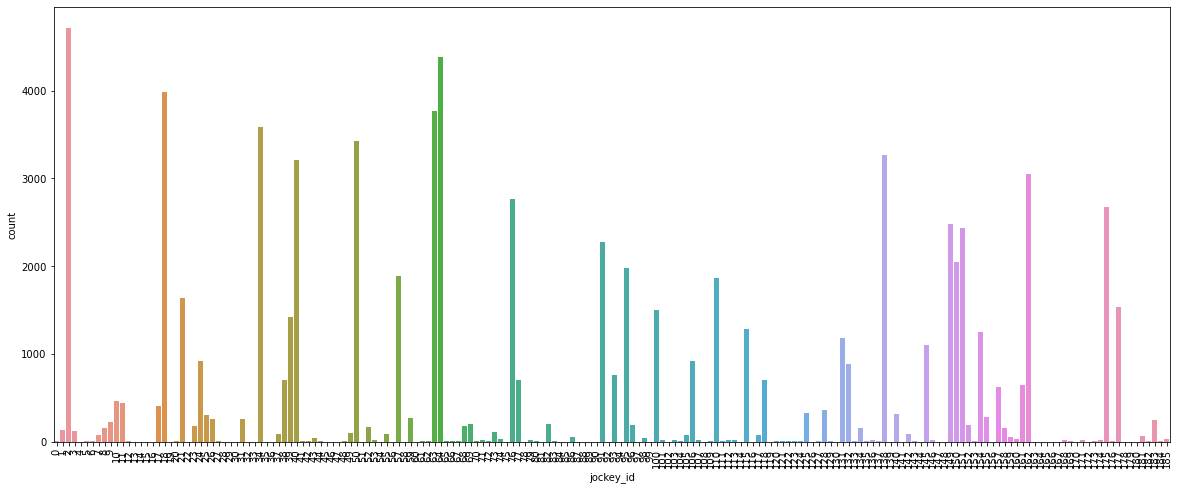

In [16]:
matplotlib.rcParams['figure.figsize'] = [20, 8]
runs_df['jockey_id'].astype("category")
chart = sns.countplot(x = 'jockey_id', data = runs_df)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
None

Jockey_id allows us to look at a component that might have a factor on win performance. We have two crucial components here that make it a viable factor for further investigation. There are individuals that represent a significant enough proportion of the total that we can interpret that these individuals might have a significant impact instead of just being a statistical insignificance. The second part is that no one individual holds such a monopoly on the group percentage as to skew the data in the direction of that individual. This makes this a perfect area for further study on things like jockey win percentage as well as ruling out groups of jockeys that have no showings or no victories to their name. It should be noted that this is not a count of victories by the jockeys but a representation of the veteranship of those jockeys.

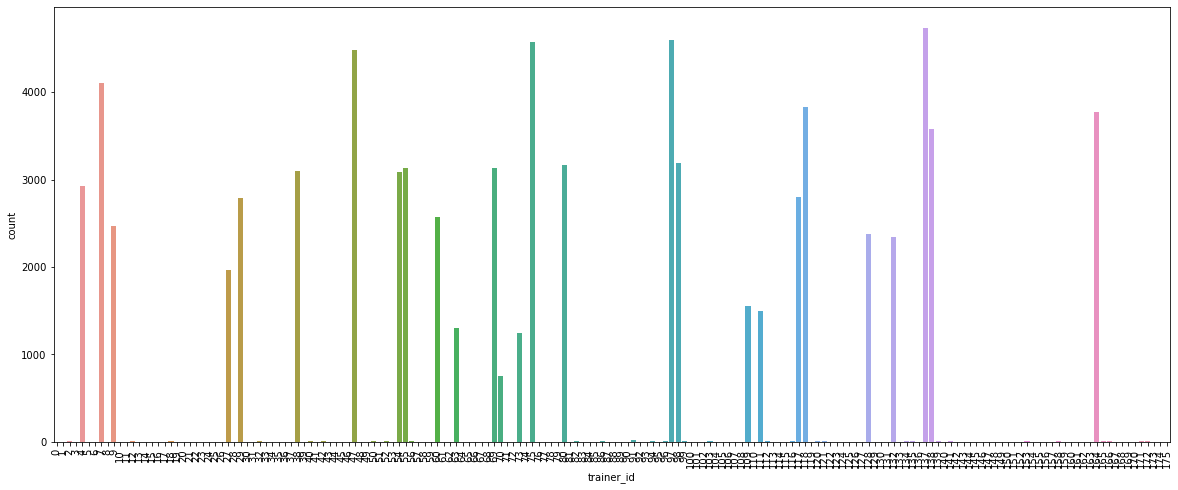

In [17]:
matplotlib.rcParams['figure.figsize'] = [20, 8]
runs_df['trainer_id'].astype("category")
chart2 = sns.countplot(x = 'trainer_id', data = runs_df)
chart2.set_xticklabels(chart2.get_xticklabels(),rotation=90)
None

Trainer_id is similar to what we see in jockey_id. For this case, because there is an even large gap between high and low observations it might be useful to slice the data set and remove horses that have been trained by trainers under a certain threshold. This would remove one off outlier observations making the data more consistent as it would be hard to statistically determine if a horses win percentage was due to the actions of that trainer or other factors, where a clear pattern can be determined from the trainers who trained a larger number of horses.

To summarize this section, we should consider looking at the following variables when conducting our initial model training: horse_age, draw, horse_country, jockey_id, and trainer_id. Once these have been investigated then we can look at adding additional pieces to the model.

## Section 6: Explore Joint Attributes

For this section, we will be exploring the relationships between multiple predictors. First, we will dive into comparing categorical predictors with other predictors. Next, we will use correlation and significance to drive our focus to identify key numerical joint attribute interactions.

### Explore Categorical Variables

#### Interaction of Win Odds with Horse Country and Horse Type

In [ ]:
# Set all plot styles to seaborn for Section 6 and 7
plt.style.use('seaborn')

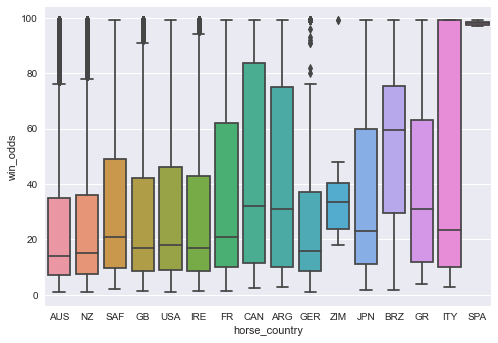

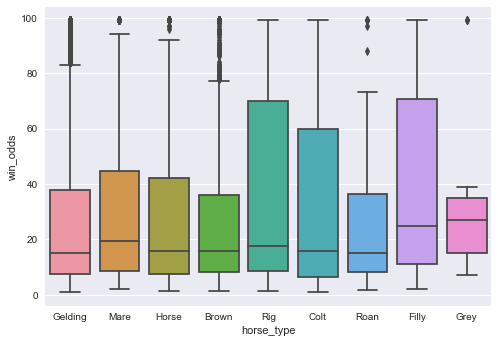

In [68]:
sns.boxplot(x="horse_country",y="win_odds",data=runs_df)
plt.show()
sns.boxplot(x="horse_type",y="win_odds",data=runs_df)
plt.show()

The top visualization shows the interaction between Horse Country and Win Odds. There are significant differences between many of the countries. Horses from Australia, New Zealand, and Germany have the lowest (best) median odds. The countries with highest (worst) odds by a large margin are Spain and Brazil. This is likely due to their small sample sizes. The bottom visualization shows the interaction between Horse Type and Win Odds. The median odds to win for each horse type are approximately the same. The minor deviations seen are due to horse types with smaller sample sizes.

### Explore Numeric Variables

#### Correllation and Significance of Numeric Variables

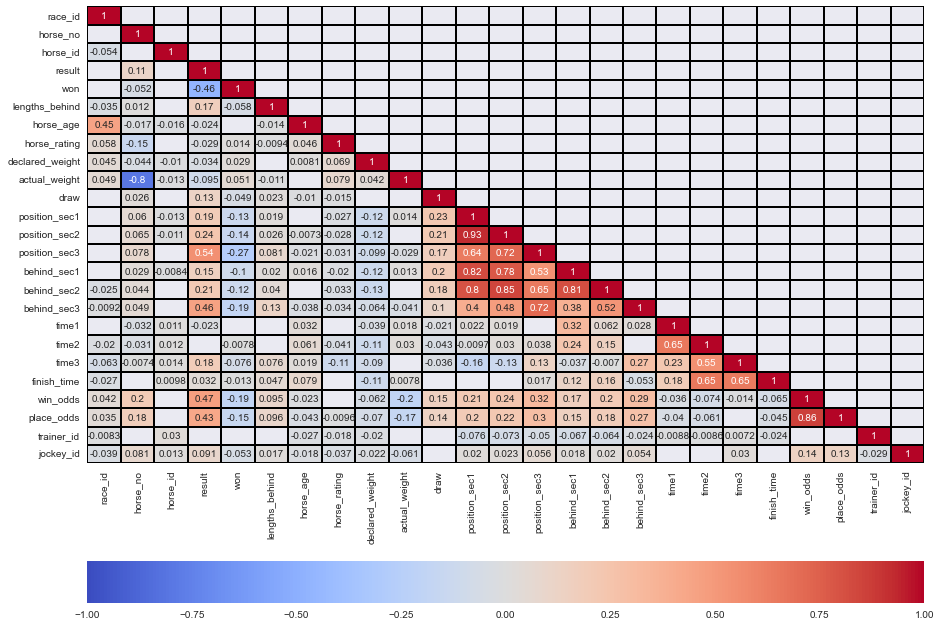

In [69]:
#code referenced from:
#https://stackoverflow.com/questions/57226054/seaborn-correlation-matrix-with-p-values-with-python

def plot_cor_matrix(corr, mask=None):
    f, ax = plt.subplots(figsize=(15, 12))
    sns.heatmap(corr, ax=ax,
                mask=mask,
                # cosmetics
                annot=True, vmin=-1, vmax=1, center=0,
                cmap='coolwarm', linewidths=2, linecolor='black', cbar_kws={'orientation': 'horizontal'})
    
def corr_sig(df=None):
    p_matrix = np.zeros(shape=(df.shape[1],df.shape[1]))
    for col in df.columns:
        for col2 in df.drop(col,axis=1).columns:
            _ , p = stats.pearsonr(df[col],df[col2])
            p_matrix[df.columns.to_list().index(col),df.columns.to_list().index(col2)] = p
    return p_matrix

# Plotting corr with significance filter
run_num=runs_df.select_dtypes(include=[np.number]) 
corr = run_num.corr()                            # get correlation
p_values = corr_sig(run_num)                     # get p-Value
mask = np.invert(np.tril(p_values<0.05))    # mask - only get significant corr
plot_cor_matrix(corr,mask)  

The correlation plot above is an incredible tool to identify the relative strength of significant correlations between numerical attributes. The top right portion of the plot above the diagonal has been greyed out to de-clutter the visual. The correlation is defined explicitly through text and visually through color at the intersection of any two numerical attributes in the bottom left portion of the visual below the diagonal. Insignificant interactions are greyed out with the correlation removed. Significance is defined as any correlation with a p-value of less than 0.05. This section is focused on the predictors, so we will not be looking at the interactions with the Result and Won attributes.

For attributes we know before a race starts, Horse Age and Place Odds have a significant correlation of -0.043. Also, Draw and Win Odds have a significant correlation of 0.15. Using in-race attributes, we can see that Draw has a correlation greater than 0.1 for all Behind_Sec and Position_Sec attributes. Draw also has significant correlations with the time attributes for each race section.

#### Horse Age vs. Place Odds

<AxesSubplot:xlabel='horse_age', ylabel='place_odds'>

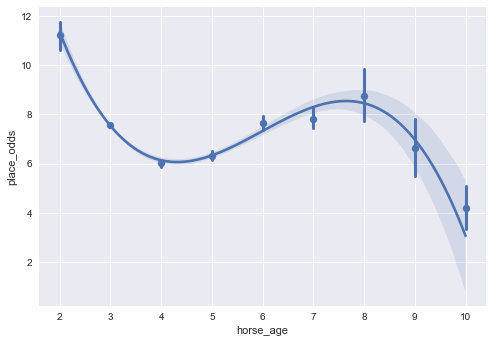

In [70]:
sns.regplot(x="horse_age", y="place_odds", data=runs_df,
                 x_estimator=np.mean, order=3)

This chart describes the Place Odds attributed to a horse based on the horse's age. The points give a 95% confidence interval for the mean Place Odds at each Horse Age, while the line represents a regression curve with a 95% confidence interval as well. Lower odds signal the horse is more favored to win the race than higher odds. We can see the optimal horse age according to odds makers is 4 to 5 years old. The odds in the years immediately before and after significantly increase. There are a very small number of horses that break this trend at ages 9 and 10. Our team speculates that the only horses still racing at this age are the most talented horses instead of the performance actually improving. These trends could be useful information for horse owners in addition to betters to understand the expected performance curve over the life of a horse.

#### Draw vs Win Odds

(0.0, 14.5)

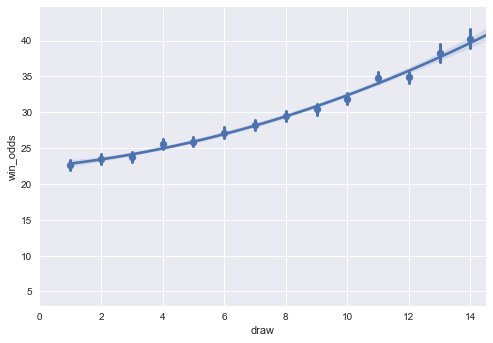

In [71]:
sns.regplot(x="draw", y="win_odds", data=runs_df,
                 x_estimator=np.mean, order=2)
plt.xlim(0,14.5)

The plot above describes the effect of the Draw on Win Odds. The draw is the randomly assigned position of the horse relative to the inside of the track. Lower numbers are closer to the inside of the track. The odds to win are clearly affected by the horse's starting position based on the draw. Higher draw positions result in higher odds that means the horse is projected to have a worse chance to win. Below, we will see how the Draw affects the in-race predictors.

#### Interaction of Draw with Position, Lengths Behind, and Time by Race Section

(5.0, 35.0)

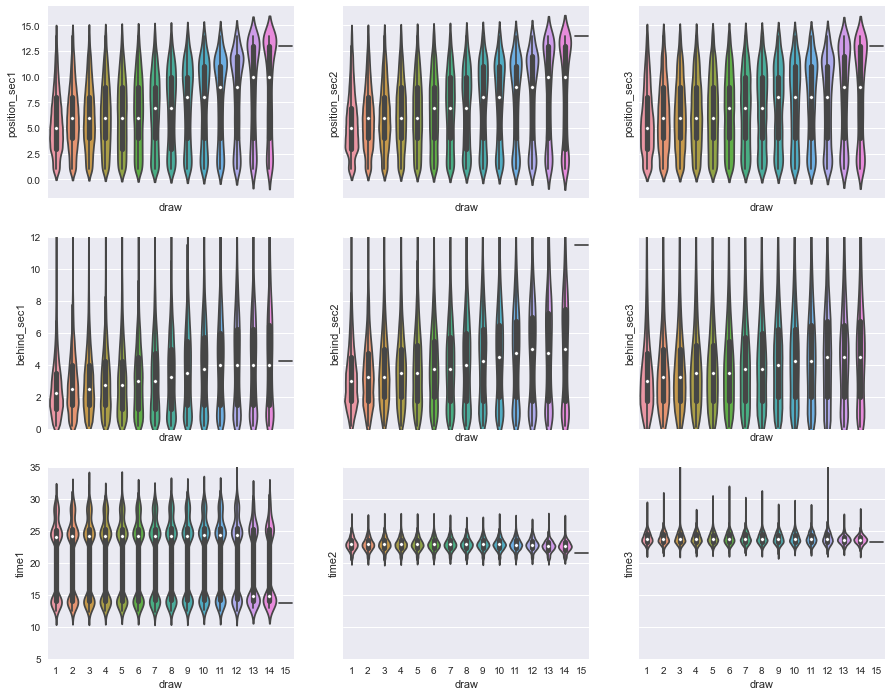

In [72]:
fig, ax = plt.subplots(3, 3, sharex='col', sharey='row',figsize=(15,12))

ax1=sns.violinplot(x='draw', y='position_sec1', data=runs_df,ax=ax[0,0])
sns.violinplot(x='draw', y='position_sec2', data=runs_df,ax=ax[0,1])
sns.violinplot(x='draw', y='position_sec3', data=runs_df,ax=ax[0,2])

ax2=sns.violinplot(x='draw', y='behind_sec1', data=runs_df,ax=ax[1,0])
sns.violinplot(x='draw', y='behind_sec2', data=runs_df,ax=ax[1,1])
sns.violinplot(x='draw', y='behind_sec3', data=runs_df,ax=ax[1,2])

ax3=sns.violinplot(x='draw', y='time1', data=runs_df,ax=ax[2,0])
sns.violinplot(x='draw', y='time2', data=runs_df,ax=ax[2,1])
sns.violinplot(x='draw', y='time3', data=runs_df,ax=ax[2,2])

ax2.set_ylim(0,12)
ax3.set_ylim(5,35)

The above nine visualizations using violin plots show the effect of Draw on attributes collected at each of 3 sections during the race. The rows are the different attributes. Row 1 describes the position of the horse in the race. Row 2 describes the horse's number of lengths behind the leader. Row 3 describes the time it takes the horse to complete the section. Each column represents the three sections of the race in order from left to right. This way we can see how the attributes change based on the Draw as the race progresses.

In Row 1, we can see that a horse is dramatically affected by the Draw position at the start of the race. As the race progresses, we can see the effects of Draw on Position are reduced but still prevalent. In Row 2, we see a similar theme with the lengths behind the leader by section. The effect of the Draw gradually reduces as the race continues, but there is a clear impact at the end of the race. In Row 3, we see a more consistent effect of Draw on Time for the section. It is worth noting the section 1 times have a clear gap between the clusters of data. We speculate that the cause may be that section 1 is defined using two different distances depending on the location of the race.

## Section 7: Explore Attributes and Class

For this section, we will be exploring the relationships between predictors and the response variables (Result and Won). We will use a similar approach to investigating the relationship of predictors as the previous section. First, we will compare categorical predictors with the response variables. Next, we will again use correlation and significance to highlight key numerical predictor interactions with the response variables.

### Explore Categorical Variables

#### Boxplot of Result for each Jockey and Trainer
##### Top 25 most frequently used Jockeys and Trainers shown

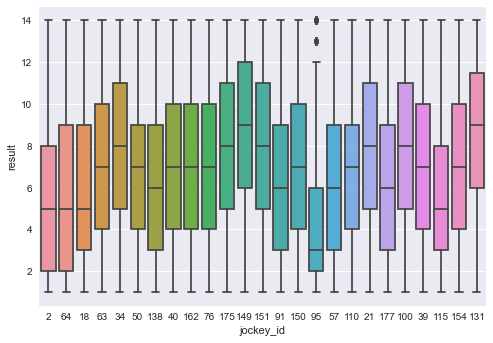

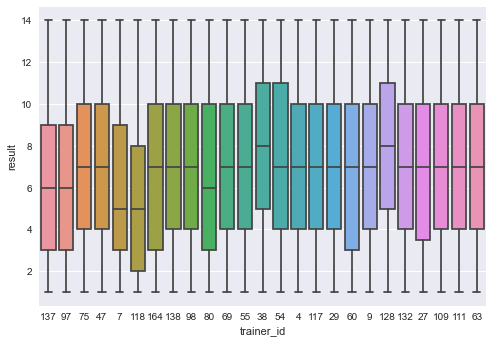

In [73]:
sns.boxplot(x=runs_df['jockey_id'],y='result',data=runs_df,
            order=pd.value_counts(runs_df['jockey_id']).iloc[:25].index)
plt.show()

sns.boxplot(x=runs_df['trainer_id'],y='result',data=runs_df,
            order=pd.value_counts(runs_df['trainer_id']).iloc[:25].index)
plt.show()

The top plot shows the boxplot for the results of each of the top 25 most used jockeys. The result represents the final position in the race for the horse, so the lower the better. There are significant differences between many of the jockeys, which indicates that they could be a significant factor in the result. With each of the jockeys displayed having a significant sample size, we can be sure the differences are not due to noise. One consideration that would be worth further investigation is to understand the jockey's performance after controlling for the horse and trainer performance. The best jockey according to the data is jockey_id 95. The lower plot shows a similar set of boxplots that look at the interaction of the top 25 most used trainers and the results. Mostly, the trainers are nearly identical in terms of performance. There are a few trainers that show stronger performance like trainer_id 118 and 7. These trainers each have a significant sample size so these differences are not likely due to noise.

### Explore Numeric Variables

#### Correllation and Significance of Numeric Variables

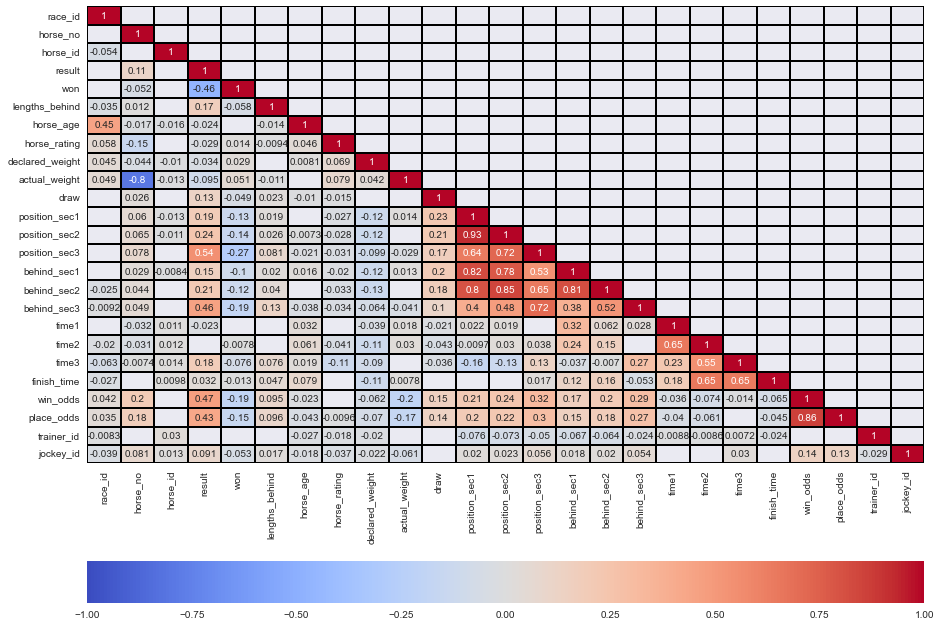

In [74]:
#code referenced from:
#https://stackoverflow.com/questions/57226054/seaborn-correlation-matrix-with-p-values-with-python

def plot_cor_matrix(corr, mask=None):
    f, ax = plt.subplots(figsize=(15, 12))
    sns.heatmap(corr, ax=ax,
                mask=mask,
                # cosmetics
                annot=True, vmin=-1, vmax=1, center=0,
                cmap='coolwarm', linewidths=2, linecolor='black', cbar_kws={'orientation': 'horizontal'})
    
def corr_sig(df=None):
    p_matrix = np.zeros(shape=(df.shape[1],df.shape[1]))
    for col in df.columns:
        for col2 in df.drop(col,axis=1).columns:
            _ , p = stats.pearsonr(df[col],df[col2])
            p_matrix[df.columns.to_list().index(col),df.columns.to_list().index(col2)] = p
    return p_matrix

# Plotting corr with significance filter
run_num=runs_df.select_dtypes(include=[np.number]) 
corr = run_num.corr()                            # get correlation
p_values = corr_sig(run_num)                     # get p-Value
mask = np.invert(np.tril(p_values<0.05))    # mask - only get significant corr
plot_cor_matrix(corr,mask)  

We are using the same correlation plot that was shown in the previous section since it can highlight significant correlations between numerical predictors and the response. The chart has masked the values in the top right of the plot above the diagonal to de-clutter the plot. Values in the bottom left below the diagonal will be greyed out if the significance of the correlation is less than 0.05. The remaining cells use color and text to visually and explicitly communicate the level of correlation between the predictors and the response. The response variables for our dataset are Result and Won. Predictors that are highly correlated with Result include position during the race, lengths behind during the race, Win Odds, Place Odds, Draw, and Actual Weight. Won has similar strong correlations as it is strongly related to Result.

#### Resut vs. Win Odds and Place Odds

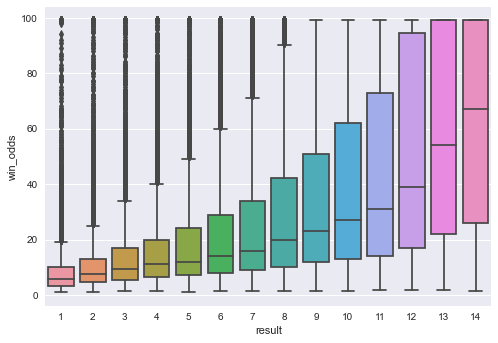

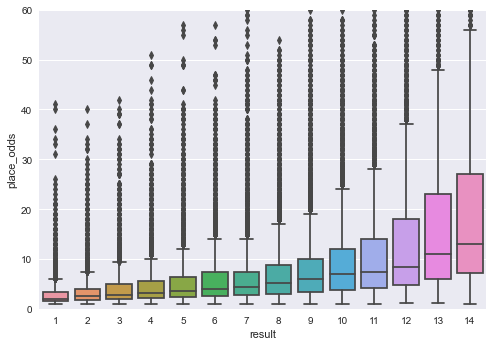

In [75]:
sns.boxplot(x='result', y='win_odds', data=runs_df)
plt.show()
sns.boxplot(x='result', y='place_odds', data=runs_df)
plt.ylim(0,60)
plt.show()

The odds makers have financial incentive to correctly predict the odds of a horse race. When betters are equally betting both sides of a bet, the odds makers will profit because there is a slight fee built into both sides of the bet. In the boxplots above, we look at the interaction of Win Odds vs. Result (top) and Place Odds vs. Result (bottom). Both plots show a clear trend that horses with lower odds (better odds) achieves lower results (better results). This is also true for horses with high odds finishing in higher positions. An interesting observation is that the variance in Odds increases as the resulting position increase. Therefore, it is more difficult for odds makers to predict horses that perform poorly compared to horses that perform well. These plots confirm that the odds makers have developed a system to predict outcomes that is significantly better than random.

#### Interaction of Result with Position, Lengths Behind, and Time by Race Section

(5.0, 35.0)

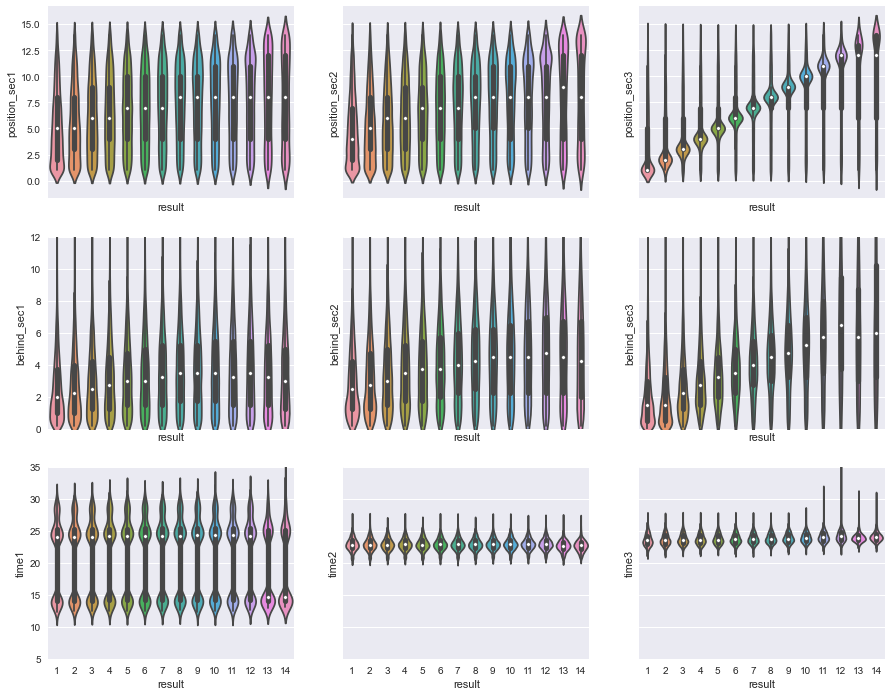

In [76]:
fig, ax = plt.subplots(3, 3, sharex='col', sharey='row',figsize=(15,12))

ax1=sns.violinplot(x='result', y='position_sec1', data=runs_df,ax=ax[0,0])
sns.violinplot(x='result', y='position_sec2', data=runs_df,ax=ax[0,1])
sns.violinplot(x='result', y='position_sec3', data=runs_df,ax=ax[0,2])

ax2=sns.violinplot(x='result', y='behind_sec1', data=runs_df,ax=ax[1,0])
sns.violinplot(x='result', y='behind_sec2', data=runs_df,ax=ax[1,1])
sns.violinplot(x='result', y='behind_sec3', data=runs_df,ax=ax[1,2])

ax3=sns.violinplot(x='result', y='time1', data=runs_df,ax=ax[2,0])
sns.violinplot(x='result', y='time2', data=runs_df,ax=ax[2,1])
sns.violinplot(x='result', y='time3', data=runs_df,ax=ax[2,2])

ax2.set_ylim(0,12)
ax3.set_ylim(5,35)

The above nine visualizations using violin plots show how the horse's final race result is influenced based on key attributes collected at each section of the race. The rows are the different attributes. Row 1 describes the position of the horse in the race. Row 2 describes the horse's number of lengths behind the leader. Row 3 describes the time it takes the horse to complete the section. Each column represents the three sections of the race in order from left to right. We can see now clearly visualize the impact of these attributes on the final result as the race progresses.

In Row 1, we can see the position in section 1 already has a clear impact on the final result of the race. Horses that start in higher positions end in higher positions. As we move across the columns, we can see the trend becomes increasingly clear. By section 3, a horse will finish typically within one position of the section 3 positions. In Row 2, we can see the differences in the lengths behind the leader start subtle in column 1 and begin to separate as you move across the columns. The lengths behind the leader increase as the result position increases. The variation also tends to increase as the result position increases. In Row 3, there is an expected subtle trend where section time increases as resulting position increases. This trend is most clearly visible in section 1 and 3. In section 2, horses run nearly identical times despite their resulting position. In section 1, we see the same issue mentioned in the previous section where there are two distinct groups of times. We speculate that racetracks may be using two different distances for section 1.

#### Draw vs. Won

(0.0, 14.5)

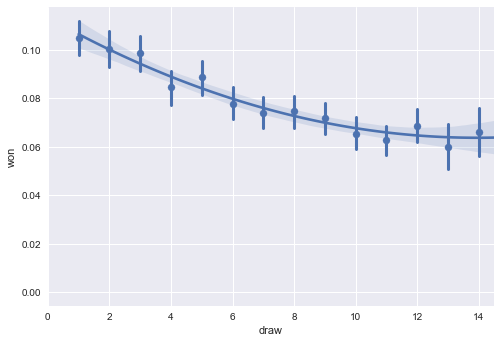

In [77]:
sns.regplot(x="draw", y="won", data=runs_df,
                 x_estimator=np.mean, order=2)
plt.xlim(0,14.5)

This plot shows the relationship of draw on win probability. The points give a 95% confidence interval for the mean Win Probability at each Draw position, while the line represents a regression curve with a 95% confidence interval as well. Win probability represents the expected value of the Won variable because the outcome can only be 0 or 1. The Draw, which determines the starting position of a horse relative to the inside of the track, has a clear negative correlation with win probability. The starting position of the horse is determined at random and further inside positions are more likely to win. This makes sense because the horse on the outside of the track technically needs to run further than the horse on the inside track.

#### Analysis of Weight on Result

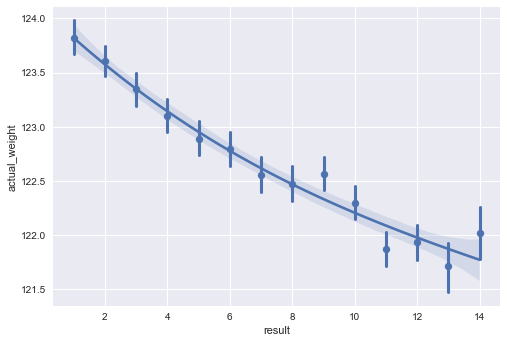

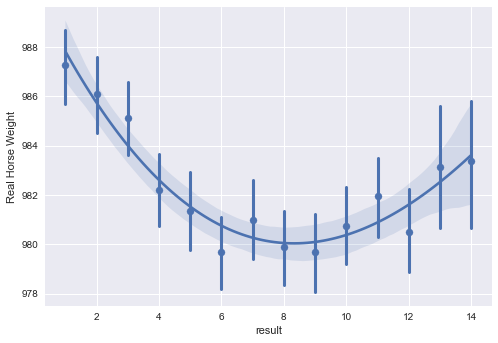

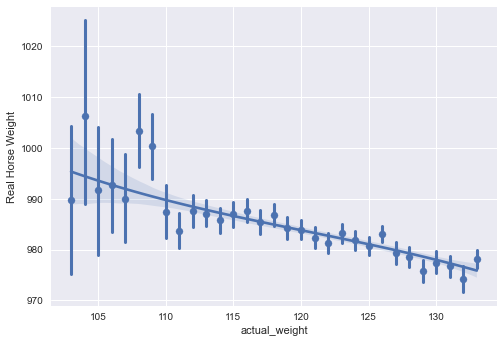

In [79]:
sns.regplot(x="result", y='actual_weight', data=runs_df,
                 x_estimator=np.mean, order=3)
plt.show()

sns.regplot(x="result", y=runs_df['declared_weight']-runs_df['actual_weight'], data=runs_df,
                 x_estimator=np.mean, order=3)
plt.ylabel("Real Horse Weight")
plt.show()

sns.regplot(x="actual_weight", y=runs_df['declared_weight']-runs_df['actual_weight'], data=runs_df,
                 x_estimator=np.mean, order=3)
plt.ylabel("Real Horse Weight")
plt.show()

These three line plots will be used to understand the effect of weight on the result. We started by looking at the top plot, which analyzes the Actual Weight against the result. The actual weight represents the amount of weight the horse carries in the race (jockey/equipment). This plot shows us that horses who finish higher tend to carry more weight, which is counterintuitive. Based on this finding, our team speculated heavier horses would tend to carry more weight during the race and would win more often. To dig into this speculation, the middle plot shows the Real Horse Weight (which is Declared Weight - Actual Weight) vs. the Result. We see result somewhat matches our speculation which was that heavier horses would finish better in the race. We can see heavier horses tend to finish near the front or the back (not so much in the middle). Finally, we wanted to see if the heavier horses were indeed carrying more weight. The bottom plot shows the Actual Weight (carried weight) vs. the Real Horse Weight. The heavier horses typically carry less weight and the lighter horses typically carry more weight. This did not match the original speculation and warrants further investigation. After reviewing all three plots, our team hypothesizes that the weights are used ensure all horses are near the same weight at the start of a race. Therefore, lighter horses would receive more weight than heavier horses. This would align with the information in the top two plots because lighter horses consistently finished in the middle while heavier horses were clustered in the highest and lowest positions.

## Section 8: New Features

The follow is a list of potential new features to be explored in the future:

1. Show Bet Performance: Transform the “results” feature in the runs.csv file into a binary feature where placing 1, 2, or 3 becomes a 1, and all other places become a 0.
<br> <br>
2. Place Bet Performance: Transform the “results” feature in the runs.csv file into a binary feature where placing 1 or 2 becomes a 1, and all other places become a 0.
<br> <br>
3. Prize in USD: transform the “prize” column in the races.csv file from HKD to USD.
<br> <br>
4. Pace: In the races.csv file there is a distance associated with each race. We can do a merge with the runs.csv which contains the final time for each horse in each race. From there, we can calculate a new feature labeled speed or pace by using the formula . We can also calculate the pace for each split of the race if needed.
<br><br>
5. Horse weight: By taking the difference of declared horse weight - actual horse weight we get a new feature containing only the horse weight.

## Section 9: Exceptional Work

One of the things we wanted to look at was reducing the number of variables while keeping the variation in the data. For this we used PCA to reduce the number of variables.

taken from https://www.mikulskibartosz.name/pca-how-to-choose-the-number-of-components/

In [31]:
from sklearn.preprocessing import MinMaxScaler

pca_data = runs_df[['lengths_behind','horse_age','horse_rating','declared_weight','actual_weight','draw','position_sec1','position_sec2','position_sec3','behind_sec1','behind_sec2','behind_sec3','time1','time2','time3','finish_time','win_odds','place_odds']]
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(pca_data)
pca = PCA(n_components = 0.90)
x_pca = pca.fit(data_rescaled).transform(data_rescaled)
pd.DataFrame(x_pca).head()

,0,1,2,3,4,5,6
0,-0.262295,0.178707,-0.389890,-0.075368,-0.284498,0.076825,-0.000870
1,0.749155,0.013482,-0.538928,-0.262686,-0.233518,0.133614,-0.066277
2,-0.639599,0.232887,-0.345378,-0.217367,-0.244476,0.006125,0.062802
3,0.367662,0.329642,-0.207853,-0.346069,-0.132667,0.187229,-0.126752
4,0.849881,0.243864,-0.268810,-0.365082,-0.247044,0.044456,0.027378


The process for PCA is relatively simple. First the data must be all continous variables. So a new data frame was created with only those factors. The second part is to scale all the data to a common factor. This keeps any one factor from being viewed as having more variation just because its scale is larger than another factor. Once this is done, PCA allows the ability to set a limit value of how much of the variation you would like explained by the new factors. We set this at 90% as it should give a considerable size of the variation without returning a huge number of variables. Using this method we were able to decrease the number of continuous variables from 18 to 6. The eigenvalues are listed above in a table. 

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

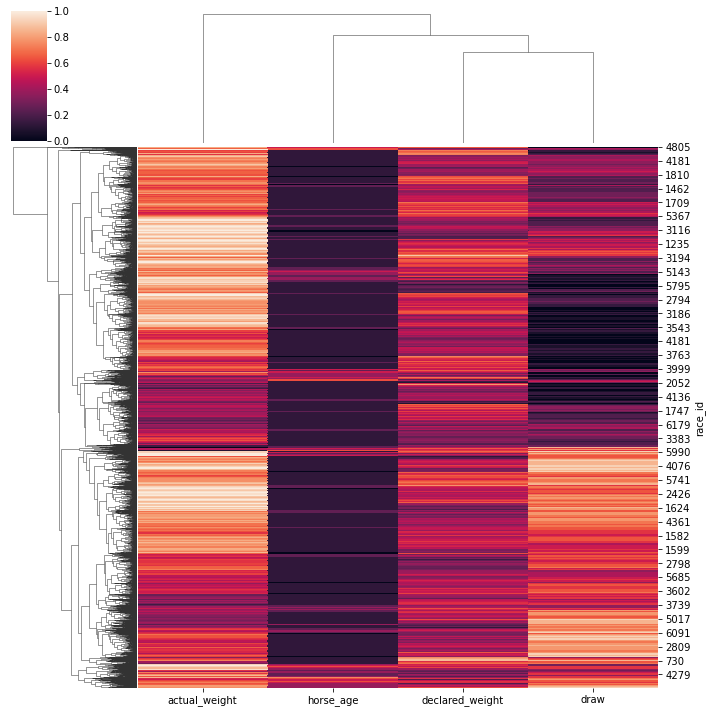

In [35]:
heatmap = runs_df[['horse_age','declared_weight','actual_weight','draw']]
heatmapsamp = heatmap.sample(frac = .5, random_state = 1)
sns.clustermap(heatmapsamp,standard_scale = 1)
None

In order to help confirm some of this but also to give more visualization into the variation. We looked at the heatmap created above from continous variables we had looked at previously. Unfortunately none of our machines could run this on the full data set so a random selection of 50% of the data was taken to creat this heat map. Looking at this data we can see that actual_weight(the weight of the jockey) provides some of the greatest controlable varaition among the groupings. Looking at the data in this light might want us to take a look more closely then at creating an horse weight category since while there is variation in declared_weight this does not seem to be as much as in actual weight. This means that lighter horses might be being paired with heavier jockeys and heavier horses paired with lighter jockeys to try to stay within a certain range. 

In [ ]:
#end